In [ ]:
import numpy as np
import matplotlib.pylab as plt
import uproot
import awkward as ak
import seaborn
import RA_funcs as rf
from scipy.signal import find_peaks


ModuleNotFoundError: No module named 'ROOT'

In [2]:
hit_data_1093 = rf.get_ROOT_data_zip_RECO(1093)

# hit_data_1101_RECO = rf.get_ROOT_data_zip_RECO(1101)

# hit_data_1080 = rf.get_ROOT_data_zip_RECO(1080)

# hit_data_1101 = rf.get_ROOT_data_zip("TB_FIRE_1101_hits.root")

1093 RECONSTRUCTED finished


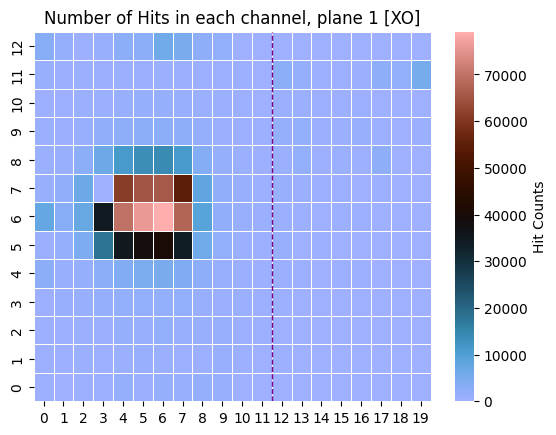

In [66]:
rf.hits_amount_colormap_single_plane(hit_data_1093, 1, cmap="berlin")

In [ ]:
# returns histogram of the energie of events starting at the stated X position
def shower_energy_histo_single_location(hit_data, Position, specific_Y = "all_rows"):

    # get only showers starting at the first plane to identify the initial location
    plane_7 = hit_data[hit_data.plane == 7]
    mask = ak.num(plane_7) == 1
    first_plane_starting_events = hit_data[mask]
    print(len(first_plane_starting_events))

    # determine the initial location of the shower
    # get the data on the first plane
    plane_7_clean = plane_7[mask]
    plane_7_channel = plane_7_clean.ch

    # divide by x positions
    y, x = divmod(plane_7_channel, 20) #y is the quontinent and is the row, x is the remainder and column
    x_list = x.to_list()
    x_ak = ak.Array(x_list)
    x_avg = ak.mean(x_ak, axis = 1)
    
    # compute the shower energy for each event
    hit_amp_array = first_plane_starting_events.amp
    print(hit_amp_array)
    event_shower_amp_array = ak.sum(hit_amp_array, axis = 1)
    print(event_shower_amp_array)
    print(len(event_shower_amp_array))

    # Filter for specific row only
    if specific_Y  != "all_rows":
        y = ak.flatten(y)
        mask_Y = y == specific_Y
        x_avg = x_avg[mask_Y]
        event_shower_amp_array = event_shower_amp_array[mask_Y]
        title = f'Energy Histograms for events starting at different initial columns, y = {specific_Y}'
    
    
    
    # get the shower energy for the X position for all events
    amps_divided_by_class, avg_amps, classes = rf.ak_groupby(x_avg, event_shower_amp_array)
    print(amps_divided_by_class)
    
    amps_class_position = amps_divided_by_class[amps_divided_by_class.classes == Position]
    amps_position = amps_class_position.data
    print(amps_position)
    amps_position_clean = ak.flatten(amps_position[ak.num(amps_position) > 0])
    
    

    # most common energy (peak of the histo)
    counts, bins = np.histogram(amps_position_clean, bins = bins, range=range)
    peak_idx = np.argmax(counts)
    peak_center = (bins[peak_idx] + bins[peak_idx + 1]) / 2
    

    # statistics
    avg_amp = np.round(ak.mean(amps_position_clean))
    
    

    # Histogram
    max_range = 12000
    range = (0, max_range)
    bin_size = 70
    bins = bins=np.arange(0, max_range + 1, bin_size)

    # Multi-line string for the box
    textstr = '\n'.join((
        f'Mean = {avg_amp:.2f}',
        f'Peak = {peak_center:.2f}',
        f'Sigma = {sigma:.2f}',
        f'RMS = {RMS:.2f}',
        f'STD = {STD:,}'
    ))

    # Place the box inside the axes
    plt.text(
        0.65, 0.75, textstr, transform=plt.gca().transAxes,
        fontsize=10, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8)
        )


    # plot the histogram with matplotlib
    plt.hist(amps_position_clean, bins = bins, range=range, label=f"avg = {avg_amp} \n peak = {peak_center}")
    plt.grid()
    plt.xlabel("Energy")
    plt.ylabel("Counts")
    plt.title(f'Energy Histograms for events starting at different initial columns, y =  {specific_Y}')
    plt.show()


171898
[[45, 61, 240, 30, 7, 408, 8, 68, ..., 22, 101, 31, 18, 92, 101, 56, 129], ...]
[6181, 3636, 5570, 4311, 4662, 7333, ..., 3934, 5730, 5512, 3504, 2214, 1183]
171898
[[{classes: 0, data: 3579}, {...}, ..., {...}, {classes: 0, data: 6441}], ...]
[[], [], [], [], [], [], [3636, 4311, ..., 1183], ..., [], [], [], [], [], []]
34144
5443.0


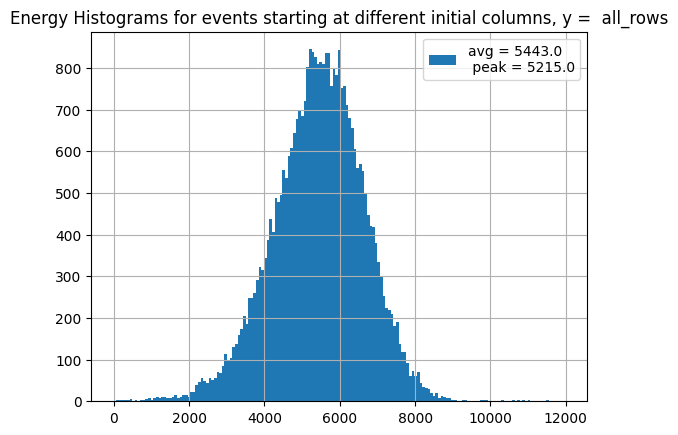

In [13]:
shower_energy_histo_single_location(hit_data_1093, 6)
